**Chapter_2_1**  
**ATMOS 6040: Environmental Statistics**  
**Alex Weech **

Download this notebook and all images and data by downloading the ZIP file from GitHub, or use the git command:

    git clone https://github.com/weech/ATMOS_5040_2019.git
    
> Note: Windows users will have to install [git for Windows](https://gitforwindows.org/) and execute the git command from the PowerShell.

# Using Julia modules
`DelimitedFiles` is a _standard library_ package that handles csv/tsv formats

`Statistics` is a _standard library_ package with some basic statistical functions

`StatsBase` is a _3rd party package_ with fancier statistical functions

`PyPlot` is a _binding_ of Python's matplotlib

In [1]:
using DelimitedFiles
using Statistics

using StatsBase
using PyPlot

# ---

# Chapter 2a

# Level of the Great Salt Lake

On GitHub, look in the `data` folder for a file called `gsl_yr.csv` and download it. 

Open the `gsl_yr.csv` file in the Jupyter Lab environment to see the column contents and the units.

- The 1st column is the Year
- The 2nd column is the Number of observations
- The 3rd column is the Lake level (in feet)

read 3 column vectors of years, number of observations, and yearly lake level for 1895-2018 period
lake level (in ft)

In [2]:
#read the lake level data
data_lev = readdlm("../data/gsl_yr.csv", ',')
year = data_lev[:, 1]
#convert lake level to meters
lev = .3048 * data_lev[:, 3];

In [3]:
display(year)
display(lev)

124-element Array{Float64,1}:
 1895.0
 1896.0
 1897.0
 1898.0
 1899.0
 1900.0
 1901.0
 1902.0
 1903.0
 1904.0
 1905.0
 1906.0
 1907.0
    ⋮  
 2007.0
 2008.0
 2009.0
 2010.0
 2011.0
 2012.0
 2013.0
 2014.0
 2015.0
 2016.0
 2017.0
 2018.0

124-element Array{Float64,1}:
 1280.58672        
 1280.49528        
 1280.5562400000001
 1280.4648         
 1280.3124         
 1280.2514400000002
 1279.91616        
 1279.30656        
 1279.2151199999998
 1279.3370400000001
 1279.1846400000002
 1279.30656        
 1279.97712        
    ⋮              
 1279.06272        
 1278.66648        
 1278.636          
 1278.54456        
 1279.2456         
 1279.3980000000001
 1278.8188800000003
 1278.39216        
 1278.14832        
 1278.08736        
 1278.3312         
 1278.1788000000001

# Read Utah annual precip and temperature 

convert inches to cm
convert F to C

In [4]:
data_ppt = readdlm("../data/utah_precip.csv", ',')
yearp = data_ppt[:, 1]
ppt = 2.54 * data_ppt[:, 2]
data_t = readdlm("../data/utah_temp.csv", ',')
yeart = data_t[:, 1]
temp = 5. .* (data_t[:, 2] .- 32) ./9;

In [5]:
#println(yearp)
#println(ppt)
#println(yeart)
#println(temp)

# Figure 2.1

Create bar plot time series of lake level, Utah ppt, and Utah temp

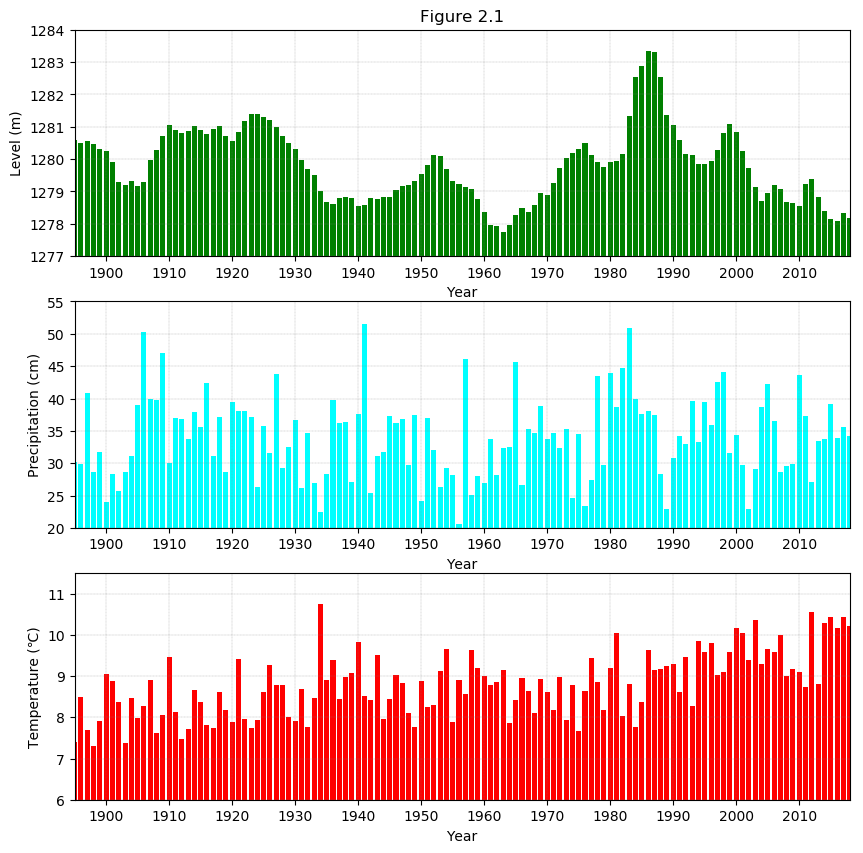

In [6]:
decade_ticks = 1900:10:2010

fig, (ax1, ax2, ax3) = subplots(3, 1, figsize=(10 ,10))
ax1[:bar](year, lev, color="green")
ax1[:set](xlim=(1895, 2018), ylim=(1277, 1284))
ax1[:set](xlabel="Year", ylabel="Level (m)")
ax1[:set](xticks=decade_ticks)
ax1[:set](title="Figure 2.1")

ax2[:bar](yearp, ppt, color="cyan")
ax2[:set](xlim=(1895, 2018),ylim=(20, 55))
ax2[:set](xlabel="Year", ylabel="Precipitation (cm)")
ax2[:set](xticks=decade_ticks)

ax3[:bar](yeart, temp, color="red")
ax3[:set](xlim=(1895, 2018), ylim=(6, 11.5))
ax3[:set](xlabel="Year", ylabel="Temperature (℃)")
ax3[:set](xticks=decade_ticks)

ax1[:grid](linestyle="--", color="grey", linewidth=.2)
ax2[:grid](linestyle="--", color="grey", linewidth=.2)
ax3[:grid](linestyle="--", color="grey", linewidth=.2)

savefig("figure_2.1_2019_julia.png")

# Figure 2.2


In [7]:
#sort the values from smallest to largest
levsort = sort(lev)
display(levsort)
#compute the range
levmin, levmax = extrema(lev)
range_lev = levmax - levmin
println("range ", range_lev)

124-element Array{Float64,1}:
 1277.7520800000002
 1277.93496        
 1277.9654400000002
 1277.9654400000002
 1278.08736        
 1278.14832        
 1278.1788000000001
 1278.27024        
 1278.3312         
 1278.3616800000002
 1278.3616800000002
 1278.39216        
 1278.4836         
    ⋮              
 1281.1658400000001
 1281.19632        
 1281.28776        
 1281.31824        
 1281.3792         
 1281.4096800000002
 1281.4096800000002
 1282.53744        
 1282.53744        
 1282.8727199999998
 1283.2994400000002
 1283.32992        

range 5.577839999999696


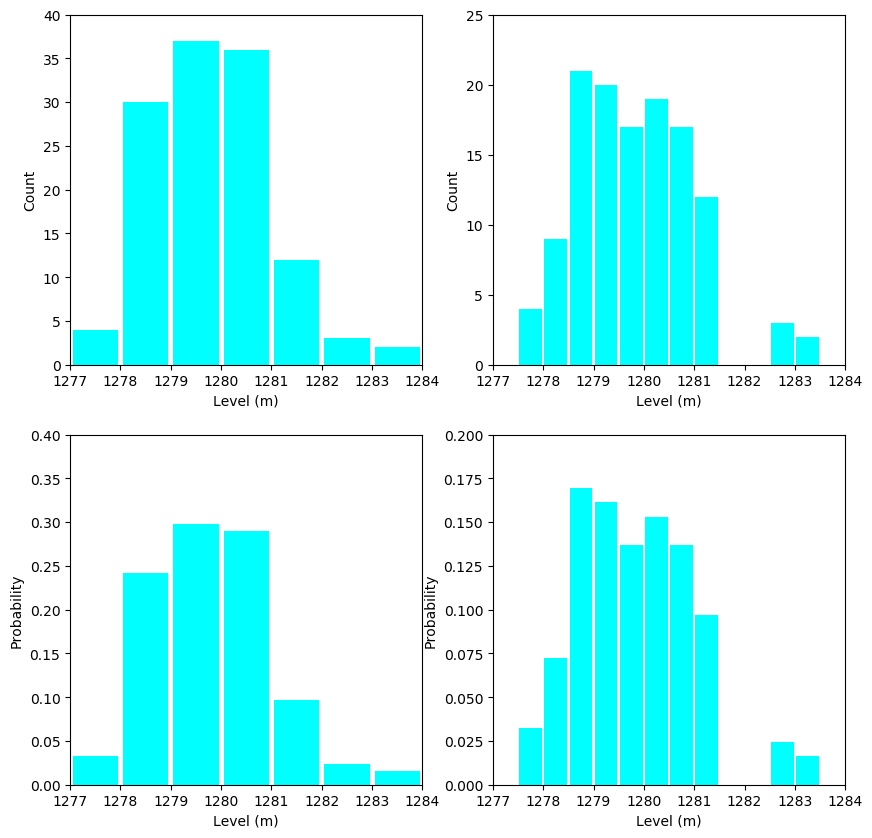

In [8]:
fig2, axes = subplots(2, 2, figsize=(10, 10))
ax1, ax2, ax3, ax4 = axes[1, 1], axes[1, 2], axes[2, 1], axes[2, 2]
x1 = collect(1277:1284)
ax1[:hist](lev, x1, color="cyan", rwidth=0.9)
ax1[:set](xlim=(1277, 1284),ylim=(0, 40))
ax1[:set](xlabel="Level (m)", ylabel="Count")

x2 = collect(1277.:0.5:1284)
ax2[:hist](lev, x2, color="cyan", rwidth=0.9)
ax2[:set](xlim=(1277, 1284), ylim=(0, 25))
ax2[:set](xlabel="Level (m)", ylabel="Count")

#display probabilities
#get total number of values
N = length(lev)
#need to weight each of the values so each one is a probability
weights = ones(size(lev)...) ./ N

ax3[:hist](lev, x1, weights=weights, color="cyan", rwidth=0.9)
ax3[:set](xlim=(1277, 1284), ylim=(0, 0.4))
ax3[:set](xlabel="Level (m)", ylabel="Probability")


ax4[:hist](lev, x2, weights=weights, color="cyan", rwidth=0.9)
ax4[:set](xlim=(1277, 1284), ylim=(0, 0.2))
ax4[:set](xlabel="Level (m)", ylabel="Probability")


savefig("figure_2.2_2019_julia.png")


# Figure 2.3

Cumulative probability distribution

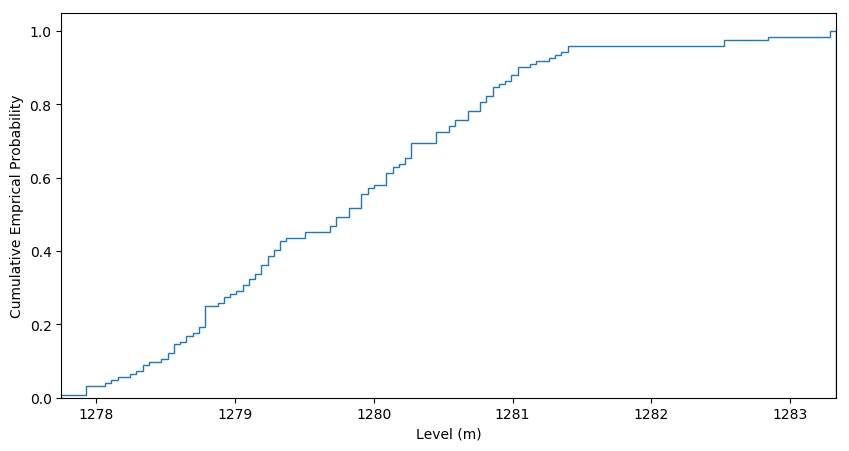

In [9]:
# plot the cumulative histogram
fig3, ax = subplots(1, 1, figsize=(10, 5))
n_bins = 124
n, bins, patches = ax[:hist](lev, n_bins, density="True", histtype="step",
                           cumulative=true, label="Empirical")
ax[:set](xlabel="Level (m)", ylabel="Cumulative Emprical Probability")
ax[:set](xlim=(minimum(lev), maximum(lev)))

savefig("figure_2.3_2019_julia.png")

# Figure 2.4 Boxplot

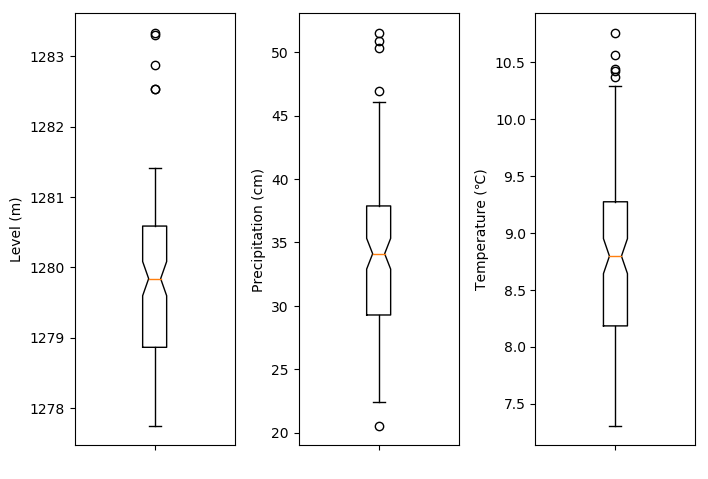

In [10]:
fig = figure(1)
ax1 = fig[:add_axes]([.05, .05, .25, .9])
ax2 = fig[:add_axes]([.40, .05, .25, .9])
ax3 = fig[:add_axes]([.77, .05, .25, .9])
#whiskers are different in PyPlot (75th percentile + wis *IQR, for example)
# in matlab 1.5 *IQR + median
ax1[:boxplot](lev, notch=true, whis=1)
ax1[:set](xticklabels=" ", ylabel="Level (m)")

ax2[:boxplot](ppt, notch=true, whis=1)
ax2[:set](xticklabels=" ", ylabel="Precipitation (cm)")

ax3[:boxplot](temp, notch=true, whis=1)
ax3[:set](xticklabels=" ", ylabel="Temperature (℃)")

savefig("figure_2.4_2019_julia.png")

#Note: the length of the whiskers is computed differently in PyPlot boxplot than in Matlab

# Measures of central tendency

We will use a mix Statistics and BaseStats to illustrate the basic statistical commands.

In [11]:
# create one 3 column array for all 3 variables of length N years
array = Array{Float64}(undef, N, 3)
array[:, 1] = lev
array[:, 2] = ppt
array[:, 3] = temp;

In [12]:
display(array)

124×3 Array{Float64,2}:
 1280.59  30.226    7.40722
 1280.5   29.9466   8.49556
 1280.56  40.9194   7.70389
 1280.46  28.6004   7.30556
 1280.31  31.7754   7.90722
 1280.25  24.0538   9.05556
 1279.92  28.2702   8.89333
 1279.31  25.7302   8.37944
 1279.22  28.702    7.38889
 1279.34  31.0642   8.48167
 1279.18  39.0652   7.98167
 1279.31  50.3174   8.28222
 1279.98  40.005    8.89833
    ⋮                      
 1279.06  28.575    9.99056
 1278.67  29.5148   9.0    
 1278.64  29.845    9.18056
 1278.54  43.6626   9.10167
 1279.25  37.2364   8.72667
 1279.4   27.0764  10.5694 
 1278.82  33.4264   8.80111
 1278.39  33.7566  10.2961 
 1278.15  39.0906  10.44   
 1278.09  33.9598  10.1611 
 1278.33  35.5346  10.4278 
 1278.18  34.2646  10.2222 

In [43]:
#compute mean of the values between the 10th and 90th percentile in the sample
function trimmean(arr, trim)
    ptrim = percentile(arr, trim)
    pitrim = percentile(arr, 1-trim)
    trimmed = [item for item in arr if ptrim <= item <= pitrim]
    return mean(trimmed)
end

xbar = mean(array, dims=1)
xmed = median(array, dims=1)
xmod = mapslices(mode, array, dims=1)
quants = [.01,.10,.25,.33,.50,.66,.75,.90,.99]
percs = mapslices(x -> quantile(x, quants), array, dims=1)
xbar_trim = mapslices(x -> trimmean(x, 0.1), array, dims=1)
println("Mean: ", xbar)
println("Median: ", xmed)
println("Mode: ", xmod)
foreach(x -> println("$(x[1]*100) Percentile ", x[2]), zip(quants, eachrow(percs)))
println("Trimmed mean: ", xbar_trim)

Mean: [1279.82 34.0686 8.80002]
Median: [1279.84 34.1122 8.79639]
Mode: [1278.82 33.7312 8.77778]
1.0 Percentile [1277.94, 22.5275, 7.39311]
10.0 Percentile [1278.5, 26.3474, 7.79028]
25.0 Percentile [1278.86, 29.2798, 8.18278]
33.0 Percentile [1279.17, 30.5707, 8.41484]
50.0 Percentile [1279.84, 34.1122, 8.79639]
66.0 Percentile [1280.28, 36.8874, 9.08948]
75.0 Percentile [1280.59, 37.8841, 9.27431]
90.0 Percentile [1281.07, 42.4561, 9.85172]
99.0 Percentile [1283.2, 50.7672, 10.5397]
Trimmed mean: [1277.93 22.4282 7.38889]


In [14]:
#compute interquartile ranges
iqr_var = mapslices(iqr, array, dims=1)
println("IQR ", iqr_var)

IQR [1.72212 8.60425 1.09153]


In [15]:
#median absolute deviation
mapslices(x -> mad(x, normalize=false), array, dims=1)

1×3 Array{Float64,2}:
 0.86868  4.4704  0.560278

# Illustrating robust and reliant central tendency metrics

In [16]:
#put in one bad value
array_wbad = ones(N, 3)
array_wbad[:, 1] = lev
array_wbad[:, 2] = ppt
array_wbad[:, 3] = temp

array_wbad[2, :] = [-9999, -9999, -9999]
xbar_wbad = mean(array_wbad, dims=1)
xmed_wbad = median(array_wbad, dims=1)
xbar_trim_wbad = mapslices(x -> trimmean(x, 0.1), array_wbad, dims=1)
println("mean ", xbar_wbad)
println("median ", xmed_wbad)
println("trimmed_mean ", xbar_trim_wbad)

mean [1188.86 -46.81 -71.9056]
median [1279.79 34.1122 8.79639]
trimmed_mean [1277.75 20.5486 7.30556]


In [17]:
# unbiased estimate of pop standard deviation and variance
std0 = std(array, dims=1)
var0 = var(array, dims=1)
# sample standard deviation and variance
std1 = std(array, corrected=false, dims=1)
var1 = var(array, corrected=false, dims=1)
println("pop standard deviation and variance: ", std0, " ", var0)
println("sample standard deviation and variance: ", std1, " ", var1)

pop standard deviation and variance: [1.14061 6.36863 0.780497] [1.30099 40.5595 0.609176]
sample standard deviation and variance: [1.136 6.3429 0.777344] [1.2905 40.2324 0.604263]


In [18]:
#skewness
skew = mapslices(skewness, array, dims=1)
println("skewness ", skew)

skewness [0.604933 0.345434 0.312011]


# Anomalies


In [19]:
#sample means
xbar = mean(array, dims=1)
array_a = array .- xbar;
display(array_a)

124×3 Array{Float64,2}:
  0.767408    -3.84257   -1.3928    
  0.675968    -4.12197   -0.304462  
  0.736928     6.85083   -1.09613   
  0.645488    -5.46817   -1.49446   
  0.493088    -2.29317   -0.892796  
  0.432128   -10.0148     0.255538  
  0.0968477   -5.79837    0.0933154 
 -0.512752    -8.33837   -0.420573  
 -0.604192    -5.36657   -1.41113   
 -0.482272    -3.00437   -0.318351  
 -0.634672     4.99663   -0.818351  
 -0.512752    16.2488    -0.517796  
  0.157808     5.93643    0.0983154 
  ⋮                                 
 -0.756592    -5.49357    1.19054   
 -1.15283     -4.55377    0.199982  
 -1.18331     -4.22357    0.380538  
 -1.27475      9.59403    0.301649  
 -0.573712     3.16783   -0.0733513 
 -0.421312    -6.99217    1.76943   
 -1.00043     -0.642169   0.00109319
 -1.42715     -0.311969   1.49609   
 -1.67099      5.02203    1.63998   
 -1.73195     -0.108769   1.36109   
 -1.48811      1.46603    1.62776   
 -1.64051      0.196031   1.4222    

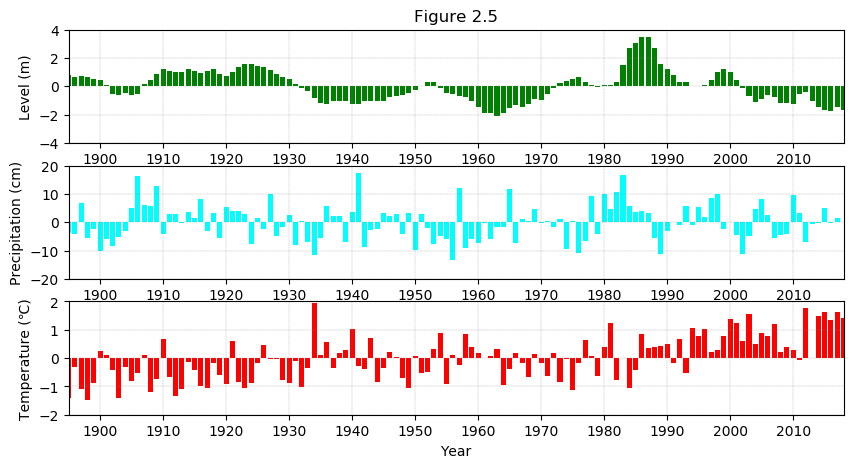

In [20]:
fig, (ax1, ax2, ax3) = subplots(3, 1, figsize=(10, 5))
ax1[:bar](year,array_a[:, 1], color="green")
ax1[:set](xlim=(1895, 2018), ylim=(-4, 4))
ax1[:set](xlabel="Year", ylabel="Level (m)")
ax1[:set](xticks=decade_ticks)
ax1[:set](title="Figure 2.5")
ax2[:bar](year, array_a[:, 2], color="cyan")
ax2[:set](xlim=(1895, 2018), ylim=(-20, 20))
ax2[:set](xlabel="Year", ylabel="Precipitation (cm)")
ax2[:set](xticks=decade_ticks)
ax3[:bar](year, array_a[:, 3], color="red")
ax3[:set](xlim=(1895, 2018), ylim=(-2, 2))
ax3[:set](xlabel="Year", ylabel="Temperature (℃)")
ax3[:set](xticks=decade_ticks)

ax1[:grid](linestyle="--", color="grey", linewidth=.2)
ax2[:grid](linestyle="--", color="grey", linewidth=.2)
ax3[:grid](linestyle="--", color="grey", linewidth=.2)

savefig("figure_2.5_2019_julia.png")

# 1981-2010 climate normal
define climate normal for 1981-2010 period. find those years

In [21]:
# define climate normal for 1981-2010 period. find the range of values during those years
#pandas handles these by index values
clim_period_idx = 1981 .<= year .<= 2010
clim_period = array[clim_period_idx, :]
display(clim_period)
cnorm = mean(clim_period, dims=1)
display(cnorm)
df_cna = array .- cnorm
display(df_cna)

30×3 Array{Float64,2}:
 1279.95  38.6334  10.0417 
 1280.16  44.704    8.04167
 1281.32  50.9016   8.80111
 1282.54  39.8526   7.75444
 1282.87  37.5412   8.37944
 1283.33  37.9984   9.63444
 1283.3   37.4142   9.14333
 1282.54  28.3718   9.185  
 1281.38  22.86     9.24056
 1281.04  30.8102   9.30556
 1280.59  34.2646   8.625  
 1280.16  32.9692   9.46778
 1280.13  39.6494   8.28222
    ⋮                      
 1281.07  31.5214   9.58333
 1280.83  34.3154  10.1711 
 1280.25  29.6926  10.0417 
 1279.73  22.9108   9.38889
 1279.12  29.1846  10.375  
 1278.7   38.735    9.30556
 1278.94  42.3164   9.67111
 1279.22  36.5506   9.58333
 1279.06  28.575    9.99056
 1278.67  29.5148   9.0    
 1278.64  29.845    9.18056
 1278.54  43.6626   9.10167

1×3 Array{Float64,2}:
 1280.43  35.5998  9.28993

124×3 Array{Float64,2}:
  0.159512   -5.37379    -1.8827  
  0.068072   -5.65319    -0.79437 
  0.129032    5.31961    -1.58604 
  0.037592   -6.99939    -1.98437 
 -0.114808   -3.82439    -1.3827  
 -0.175768  -11.546      -0.23437 
 -0.511048   -7.32959    -0.396593
 -1.12065    -9.86959    -0.910481
 -1.21209    -6.89779    -1.90104 
 -1.09017    -4.53559    -0.808259
 -1.24257     3.46541    -1.30826 
 -1.12065    14.7176     -1.0077  
 -0.450088    4.40521    -0.391593
  ⋮                               
 -1.36449    -7.02479     0.70063 
 -1.76073    -6.08499    -0.289926
 -1.79121    -5.75479    -0.10937 
 -1.88265     8.06281    -0.188259
 -1.18161     1.63661    -0.563259
 -1.02921    -8.52339     1.27952 
 -1.60833    -2.17339    -0.488815
 -2.03505    -1.84319     1.00619 
 -2.27889     3.49081     1.15007 
 -2.33985    -1.63999     0.871185
 -2.09601    -0.0651933   1.13785 
 -2.24841    -1.33519     0.932296

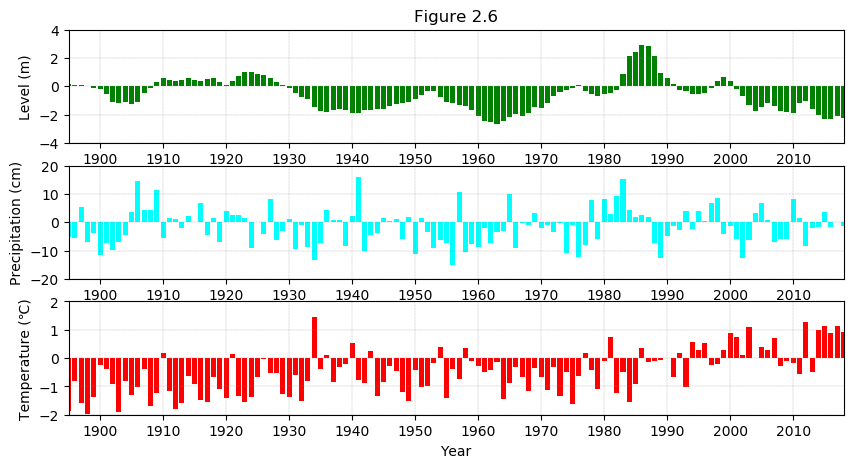

In [22]:
fig, (ax1, ax2, ax3) = subplots(3, 1, figsize=(10, 5))
ax1[:bar](year, df_cna[:, 1], color="green")
ax1[:set](xlim=(1895, 2018), ylim=(-4, 4))
ax1[:set](xlabel="Year", ylabel="Level (m)")
ax1[:set](xticks=decade_ticks)
ax1[:set](title="Figure 2.6")
ax2[:bar](year, df_cna[:, 2], color="cyan")
ax2[:set](xlim=(1895,2018),ylim=(-20,20))
ax2[:set](xlabel="Year", ylabel="Precipitation (cm)")
ax2[:set](xticks=decade_ticks)
ax3[:bar](year, df_cna[:, 3], color="red")
ax3[:set](xlim=(1895,2018), ylim=(-2,2))
ax3[:set](xlabel="Year", ylabel="Temperature (℃)")
ax3[:set](xticks=decade_ticks)

ax1[:grid](linestyle="--", color="grey", linewidth=.2)
ax2[:grid](linestyle="--", color="grey", linewidth=.2)
ax3[:grid](linestyle="--", color="grey", linewidth=.2)

savefig("figure_2.6_2019_julia.png")

# Handling Monthly Great Salt Lake Level

salt lake level begins in 1903 through 2018
create 2d array levm for processing
rows are years and columns are months
dates will be the midpoint of the month


In [23]:
#read the Monthly lake level data
data_levm = readdlm("../data/gsl_monthly.csv", ',')
yearm = data_levm[:, 1]
nym = Int.(maximum(yearm) - minimum(yearm))+1
nm = 12
levm = Array{Float64, 2}(undef, nym, nm)
datem = Array{Float64, 2}(undef, nym, nm)
for i in 1:nym
    for j in 1:nm
        ic = (i-1)*nm + j
        levm[i, j] = data_levm[ic, 3]* 0.3048
        datem[i, j] = data_levm[ic, 1] + (data_levm[ic, 2] - 0.5) / 12
    end
end

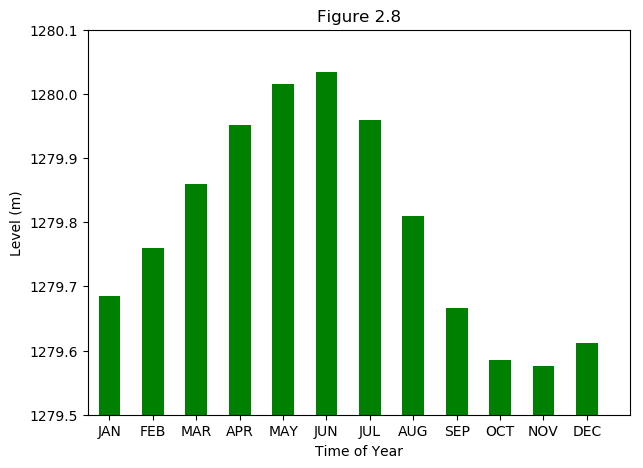

[1279.68, 1279.76, 1279.86, 1279.95, 1280.02, 1280.03, 1279.96, 1279.81, 1279.67, 1279.59, 1279.58, 1279.61]
[1.17872, 1.17455, 1.16278, 1.1608, 1.15969, 1.17143, 1.17222, 1.18458, 1.18831, 1.18749, 1.19528, 1.19356]


In [24]:
#compute monthly mean and sample standard deviation for each month over all years
mean_m = dropdims(mean(levm, dims=1), dims=1)
sx_m = dropdims(std(levm, corrected=false, dims=1), dims=1)
println(mean_m)
println(sx_m)

#plot monthly mean;
xb = collect(0.5:11.5)
fig8, ax8 = subplots(1, 1, figsize=(7, 5))
ax8[:bar](xb, mean_m, color="g", align="center", width=0.5)
ax8[:set](xlabel="Time of Year", ylabel="Level (m)")
ax8[:set](xlim=(0, 12.5), ylim=(1279.5, 1280.1)) 
ax8[:set](xticks=xb, xticklabels=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"])
ax8[:ticklabel_format](axis="y", style="plain", useOffset=false)
ax8[:set](title="Figure 2.8")
savefig("figure_2.8_2019.png")


In [45]:
#compute anomalies from monthly means
levm_a = levm .- reshape(mean_m, 1, length(mean_m))
nom = length(levm_a)
levma = reshape(permutedims(levm_a), nom)
z = levm_a ./ reshape(sx_m, 1, length(mean_m))
za = reshape(permutedims(z), nom);

In [48]:
fig7, (ax1, ax2, ax3) = subplots(3, 1, figsize=(10, 10))
decade_ticks = collect(1910:10:2010)
ax1[:bar](datemon, levmon, color="green")
ax1[:set](xlim=(1903, 2019), ylim=(1277, 1284))
ax1[:set](xlabel="Year", ylabel="Level (m)")
ax1[:set](xticks=decade_ticks)
ax1[:set](title="Figure 2.7")
ax2[:bar](datemon, levma, color="green")
ax2[:set](xlim=(1903, 2019), ylim=(-2.5, 4))
ax2[:set](xlabel="Year", ylabel="Anomalies (m)")
ax2[:set](xticks=decade_ticks)
ax3[:bar](datemon, za, color="cyan")
ax3[:set](xlim=(1903, 2018), ylim=(-2.5, 4))
ax3[:set](xlabel="Year", ylabel="Standardized Anomlies")
ax3[:set](xticks=decade_ticks)

ax1[:grid](linestyle="--", color="grey", linewidth=.2)
ax2[:grid](linestyle="--", color="grey", linewidth=.2)
ax3[:grid](linestyle="--", color="grey", linewidth=.2)

savefig("figure_2.7_2019.png")

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /Users/Authenticated User/.julia/packages/PyCall/0jMpb/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError('only size-1 arrays can be converted to Python scalars',)
  File "/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py", line 1717, in inner
    return func(ax, *args, **kwargs)
  File "/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py", line 2085, in bar
    label='_nolegend_',
  File "/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py", line 659, in __init__
    Patch.__init__(self, **kwargs)
  File "/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py", line 103, in __init__
    self.set_linewidth(linewidth)
  File "/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py", line 351, in set_linewidth
    self._linewidth = float(w)


In [27]:
# CDF of monthly lake level
fig9, ax = subplots(1, 1, figsize=(10, 5))
display(nom)
display(za)
n, bins, patches = ax[:hist](za, nom, density="True", histtype="step",
                             cumulative=true, label="Empirical")
ax[:set](xlabel="Standardized Anomalies", ylabel="Cumulative Emprical Probability")
ax[:set](xlim=(-2, maximum(za)))


savefig("figure_2.9_2019.png")

UndefVarError: UndefVarError: nom not defined

# Mean and Median smoothers
One way is to use pandas built in functions to handle. 
These are the sorts of things pandas is intended to handle

In [28]:
#first get anomalies for Utah Precipitation only just for convenience as a Series
function smooth(f, input, window, passes)
    tmp = copy(input)
    smooth = similar(input)
    n = length(input)
    for j in 1:passes
        half = (window - 1) ÷ 2 
        smooth[1:half] = tmp[1:half]
        smooth[n-half+1:n] = tmp[n-half+1:n]
        for i in half+1:n-half
            values = tmp[i-half:i+half]
            smooth[i] = f(values)
        end
        tmp = copy(smooth)
    end
    return smooth
end
ppt_vals = array[:, 2]
ppt_climo = mean(ppt_vals)
ppt_a = ppt_vals .- ppt_climo
#window is how many values to roll over and compute mean or median
window = 3
#iter is number of iterations to repeat
iter = 5
#do the first ones
vals_mean = smooth(mean, ppt_a, window, iter)
vals_median = smooth(median, ppt_a, window, iter);

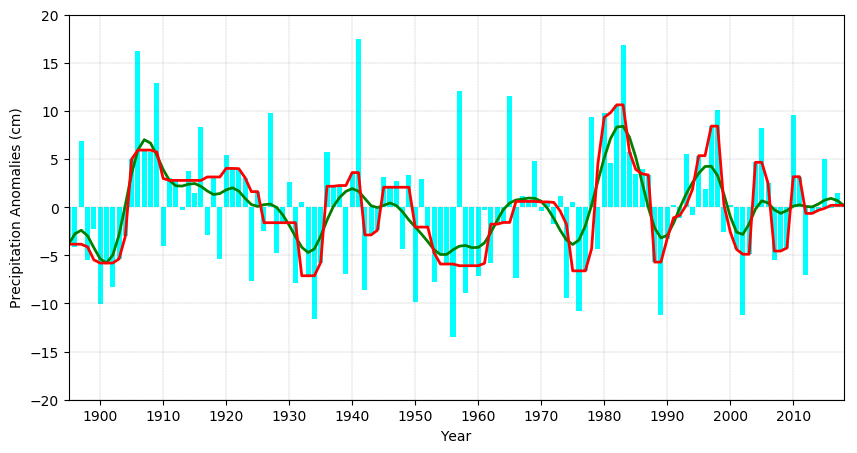

In [29]:
# plot Utah precipitation with mean and medians superimposed
decade_ticks = collect(1900:10:2010)
fig10, ax = subplots(1, 1, figsize=(10, 5))
ax[:bar](year, array_a[:, 2], color="cyan")
ax[:plot](year, vals_mean, color="green", linewidth=2)
ax[:plot](year, vals_median, color="red", linewidth=2)
ax[:set](xlim=(1895, 2018), ylim=(-20, 20))
ax[:set](xlabel="Year", ylabel="Precipitation Anomalies (cm)")
ax[:set](xticks=decade_ticks)
ax[:grid](linestyle="--", color="grey", linewidth=.2)
savefig("figure_2.10_2019_julia.png")